### Task 1

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
import random

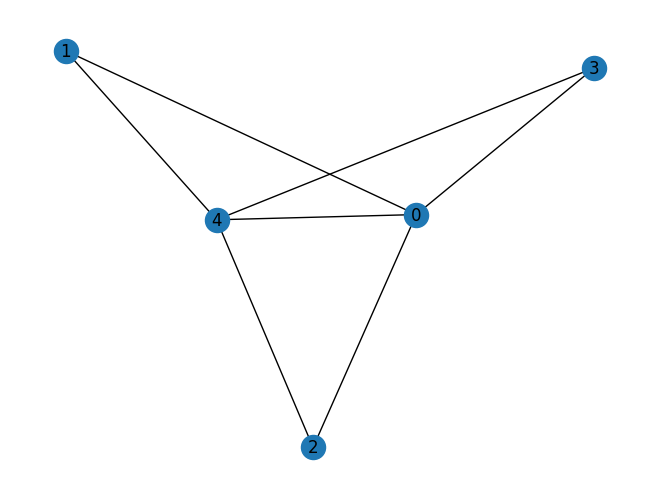

Edges --> [(0, 1), (0, 2), (0, 3), (0, 4), (1, 4), (2, 4), (3, 4)]


In [6]:
def generate_ER_graph(n, p):
    G = nx.erdos_renyi_graph(n,p)
    nx.draw(G, with_labels = True)
    plt.show()
    return G

def create_ER_graph(n, p):
    G = nx.erdos_renyi_graph(n,p)
    return G

# Run
n = 5
p = 0.4
G = generate_ER_graph(n,p)
print("Edges -->", G.edges())


In [25]:
# Setting up variables
tries = 100
n = 51
p = 0.5
edges_repetitions = []

#X --> number of nodes with x edges in the graph. This is our Binomial Distribution variable.
frequency = {
    0: 0,
    1: 0,
    2: 0,
    3: 0,
    4: 0
}

# Based on p = 0.4 and n = 5, then n' = n - 1 => n' = 4. The Binomial probability of edges for each node would be:
binomial_p = {
    0: 0.1296,
    1: 0.3456,
    2: 0.3456,
    3: 0.1536,
    4: 0.0256
}

# Running the tries
for i in range(0,tries):
    G = create_ER_graph(n,p)
    for node in G.nodes():
        edges_repetitions.append(len(G.edges(node)))


# Count the number of edges for each node.
for node in range(0,n):
    reps = Counter(edges_repetitions)[node]
    frequency[node] = reps
    print("X:", node, "----Frequency:" , reps, "----Relative Frequency:" ,reps/(tries * n))


X: 0 ----Frequency: 0 ----Relative Frequency: 0.0
X: 1 ----Frequency: 0 ----Relative Frequency: 0.0
X: 2 ----Frequency: 0 ----Relative Frequency: 0.0
X: 3 ----Frequency: 0 ----Relative Frequency: 0.0
X: 4 ----Frequency: 0 ----Relative Frequency: 0.0
X: 5 ----Frequency: 0 ----Relative Frequency: 0.0
X: 6 ----Frequency: 0 ----Relative Frequency: 0.0
X: 7 ----Frequency: 0 ----Relative Frequency: 0.0
X: 8 ----Frequency: 0 ----Relative Frequency: 0.0
X: 9 ----Frequency: 0 ----Relative Frequency: 0.0
X: 10 ----Frequency: 0 ----Relative Frequency: 0.0
X: 11 ----Frequency: 0 ----Relative Frequency: 0.0
X: 12 ----Frequency: 0 ----Relative Frequency: 0.0
X: 13 ----Frequency: 0 ----Relative Frequency: 0.0
X: 14 ----Frequency: 0 ----Relative Frequency: 0.0
X: 15 ----Frequency: 13 ----Relative Frequency: 0.0025490196078431374
X: 16 ----Frequency: 28 ----Relative Frequency: 0.005490196078431373
X: 17 ----Frequency: 45 ----Relative Frequency: 0.008823529411764706
X: 18 ----Frequency: 81 ----Relative 

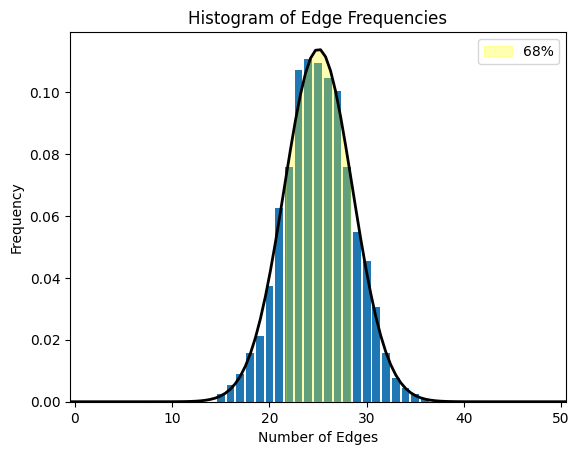

In [88]:
import numpy as np
from scipy.stats import norm
# Plotting the histogram
plt.hist(edges_repetitions, bins=range(0, max(edges_repetitions) + 1), align='left', density=True, rwidth=0.8)
plt.title("Histogram of Edge Frequencies")
plt.xlabel("Number of Edges")
plt.ylabel("Frequency")
plt.xlim(-0.5, n + 0.5)  # Set the x-axis limits
# plt.show()

# Calculate mean and standard deviation
mean_edges = np.mean(edges_repetitions)
std_edges = np.std(edges_repetitions)

# Plot the normal distribution based on the CLT
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean_edges, std_edges)
plt.plot(x, p, 'k', linewidth=2)


# Shade regions within 1, 2, and 3 standard deviations
plt.fill_between(x, p, where=[(xi >= mean_edges - std_edges) and (xi <= mean_edges + std_edges) for xi in x], color='yellow', alpha=0.3, label='68%')
# plt.fill_between(x, p, where=[(xi >= mean_edges - 2*std_edges) and (xi <= mean_edges + 2*std_edges) for xi in x], color='orange', alpha=0.3, label='95%')
# plt.fill_between(x, p, where=[(xi >= mean_edges - 3*std_edges) and (xi <= mean_edges + 3*std_edges) for xi in x], color='red', alpha=0.3, label='99.7%')

plt.legend()
plt.show()


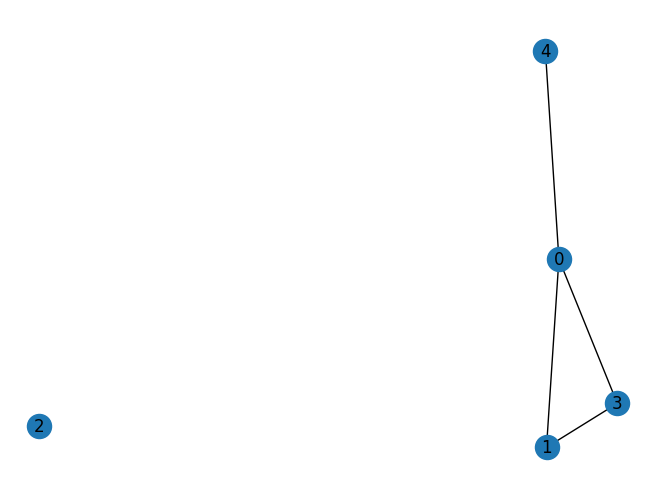

In [5]:
generate_ER_graph(n,p)

### Task 2

In [34]:
def create_correlated_er_graphs(n, p00, p01, p10, p11):
    if p00 + p10 + p01 + p11 != 1.0:
        raise ValueError("Probabilities must sum up to 1")
        
    # Generate two ER graphs with n vertices
    g1 = nx.erdos_renyi_graph(n, p00)
    g2 = nx.erdos_renyi_graph(n, p00)

    # Iterate through all edges and modify them based on correlation parameters
    for i in range(n):
        for j in range(i + 1, n):
            # Randomly decide the correlation between edges
            r = random.random()
            if r < p01:
                # Edge in G1, no edge in G2
                g1.add_edge(i, j)
            elif r < p01 + p10:
                # Edge in G2, no edge in G1
                g2.add_edge(i, j)
            elif r < p01 + p10 + p11:
                # Edge in both G1 and G2
                g1.add_edge(i, j)
                g2.add_edge(i, j)

    # plt.figure(figsize=(12, 5))
    # plt.subplot(121)
    # plt.title("Graph 1")
    # nx.draw(g1, with_labels=True, node_size=200, node_color='skyblue', font_size=8, font_color='black', font_weight='bold')
    # plt.subplot(122)
    # plt.title("Graph 2")
    # nx.draw(g2, with_labels=True, node_size=200, node_color='lightcoral', font_size=8, font_color='black', font_weight='bold')
    # plt.tight_layout()
    # plt.show()

    return g1, g2


# Execute

n = 4
p00 = 0.1
p10 = 0.2
p01 = 0.3
p11 = 0.4

G1, G2 = create_correlated_er_graphs(n,p00,p10,p01,p11)




In [35]:
#Setting up the parameters for the tries
tries = 10000
n = 4
p00 = 0.1
p01 = 0.2
p10 = 0.3
p11 = 0.4

# Possibilities based on the p input and their frequencies:
possibilities = {
    (0,0): 0,
    (0,1): 0,
    (1,0): 0,
    (1,1): 0
}

# Running the tries
for i in range(0,tries):
    G1, G2 = create_correlated_er_graphs(n,p00,p10,p01,p11)
    all_vertex_pairs = [(u, v) for u in G1.nodes() for v in G1.nodes() if u < v]
    for e1 in G1.edges():
        if e1 in G2.edges():
            possibilities[(1,1)] += 1
        else:
            possibilities[(1,0)] += 1
    for e2 in G2.edges():
        # I do not check if e2 in G1 because I already did it in the previous check.
        if e2 not in G1.edges():
            possibilities[(0,1)] += 1
    for vertex_pair in all_vertex_pairs:
        if vertex_pair not in G1.edges() and vertex_pair not in G2.edges():
            possibilities[(0,0)] += 1

# Get all possible pairs of vertices that could form edges
all_vertex_pairs = [(u, v) for u in G1.nodes() for v in G1.nodes() if u < v]

sub = tries * len(all_vertex_pairs)
for k, v in possibilities.items():
    rel_freq = v/sub
    if k == (0,0):
        distance = p00 - rel_freq
    elif k == (0,1):
        distance = p01 - rel_freq
    elif k == (1,0):
        distance = p10 - rel_freq
    elif k == (1,1):
        distance = p11 - rel_freq
    print(k, v, rel_freq, distance)

(0, 0) 4846 0.08076666666666667 0.01923333333333334
(0, 1) 11140 0.18566666666666667 0.014333333333333337
(1, 0) 16933 0.28221666666666667 0.017783333333333318
(1, 1) 27081 0.45135 -0.05134999999999995


### Task 3

Step 1

G2 edges: [(0, 1), (0, 3), (1, 2), (1, 3), (2, 3)]
Permuted vertices: [3, 2, 0, 1] ---> [{0: 3}, {1: 2}, {2: 0}, {3: 1}]
G2 Permuted edges: [(3, 2), (3, 1), (2, 0), (2, 1), (0, 1)]
---------
Fraction of pairs with no edges in both graphs (pb00): 0.3333333333333333
Fraction of pairs with edges in the first but not the second graph (pb10): 0.5
Fraction of pairs with edges in the second but not the first graph (pb01): 0.6666666666666666
Fraction of pairs with edges in both graphs (pb11): 0.16666666666666666


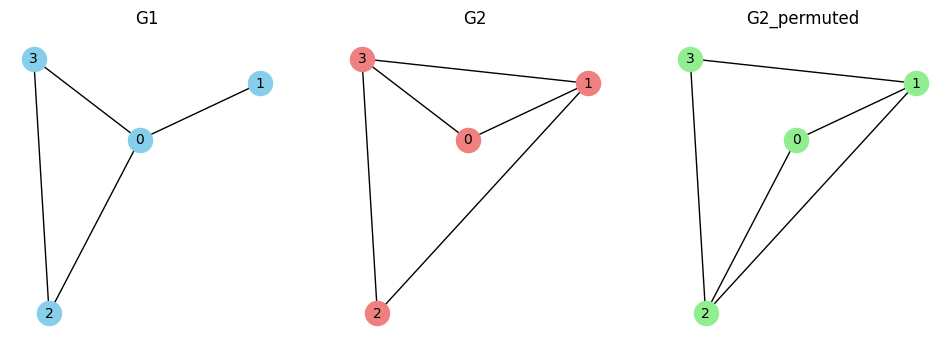

In [36]:
def calculate_edge_fractions(G1, G2_permuted):
    common_edges = len(set(G1.edges()).intersection(G2_permuted.edges()))
    unique_edges_G1 = len(set(G1.edges()) - set(G2_permuted.edges()))
    unique_edges_G2 = len(set(G2_permuted.edges()) - set(G1.edges()))

    total_possible_edges = (len(G1) * (len(G1) - 1)) // 2
    no_edges =  total_possible_edges - len(G1.edges())

    pb00 = no_edges / total_possible_edges
    pb10 = unique_edges_G1 / total_possible_edges
    pb01 = unique_edges_G2 / total_possible_edges
    pb11 = common_edges / total_possible_edges

    return pb00, pb10, pb01, pb11

def visualize_graphs(G1, G2, G2_permuted):
    pos = nx.spring_layout(G1, seed=42)
    plt.figure(figsize=(12, 4))

    plt.subplot(131)
    nx.draw(G1, pos, with_labels=True, node_color='skyblue', node_size=300, font_size=10)
    plt.title("G1")

    plt.subplot(132)
    nx.draw(G2, pos, with_labels=True, node_color='lightcoral', node_size=300, font_size=10)
    plt.title("G2")

    plt.subplot(133)
    nx.draw(G2_permuted, pos, with_labels=True, node_color='lightgreen', node_size=300, font_size=10)
    plt.title("G2_permuted")

    plt.show()

def permute_random(graph):
    n = len(graph.nodes())
    permute_vertices = list(range(n))
    random.shuffle(permute_vertices)
    return permute_vertices, nx.relabel_nodes(graph, {i: permute_vertices[i] for i in range(n)})


n = 4
p00 = 0.1
p1 = 0.2 
p2 = 0.3  
p11= 0.4

G1, G2 = create_correlated_er_graphs(n,p00,p1,p2,p11)

# Generate a random permutation of vertices for G2
# permuted_vertices = list(range(n))
# random.shuffle(permuted_vertices)
# G2_permuted = nx.relabel_nodes(G2, {i: permuted_vertices[i] for i in range(n)})
permuted_vertices, G2_permuted = permute_random(G2)
print("G2 edges:", G2.edges())
print("Permuted vertices:", permuted_vertices, "--->", [{i: permuted_vertices[i]} for i in range(n)])
print("G2 Permuted edges:", G2_permuted.edges())
print("---------")

pb00, pb10, pb01, pb11 = calculate_edge_fractions(G1, G2_permuted)
print("Fraction of pairs with no edges in both graphs (pb00):", pb00)
print("Fraction of pairs with edges in the first but not the second graph (pb10):", pb10)
print("Fraction of pairs with edges in the second but not the first graph (pb01):", pb01)
print("Fraction of pairs with edges in both graphs (pb11):", pb11)


visualize_graphs(G1, G2, G2_permuted)

In [38]:
#Setting up the parameters for the tries
tries = 100
n = 51
p00 = 0.1
p01 = 0.2
p10 = 0.3
p11 = 0.4

# Possibilities based on the p input and their frequencies:
possibilities = {
    (0,0): 0,
    (0,1): 0,
    (1,0): 0,
    (1,1): 0
}

# Running the tries
for i in range(0,tries):
    G1, G2 = create_correlated_er_graphs(n,p00,p10,p01,p11)
    permuted_vertices, G2_permuted = permute_random(G2)
    pb00, pb10, pb01, pb11 = calculate_edge_fractions(G1, G2_permuted)

    all_vertex_pairs = [(u, v) for u in G1.nodes() for v in G1.nodes() if u < v]
    for e1 in G1.edges():
        if e1 in G2_permuted.edges():
            possibilities[(1,1)] += 1
        else:
            possibilities[(1,0)] += 1
    for e2 in G2_permuted.edges():
        # I do not check if e2 in G1 because I already did it in the previous check.
        if e2 not in G1.edges():
            possibilities[(0,1)] += 1
    for vertex_pair in all_vertex_pairs:
        if vertex_pair not in G1.edges() and vertex_pair not in G2_permuted.edges():
            possibilities[(0,0)] += 1

# Get all possible pairs of vertices that could form edges
all_vertex_pairs = [(u, v) for u in G1.nodes() for v in G1.nodes() if u < v]

sub = tries * len(all_vertex_pairs)
for k, v in possibilities.items():
    rel_freq = v/sub
    if k == (0,0):
        distance = p00 - rel_freq
    elif k == (0,1):
        distance = p01 - rel_freq
    elif k == (1,0):
        distance = p10 - rel_freq
    elif k == (1,1):
        distance = p11 - rel_freq
    print(k, v, p00, rel_freq, distance)
    

(0, 0) 12555 0.1 0.09847058823529412 0.0015294117647058902
(0, 1) 21797 0.1 0.17095686274509803 0.029043137254901985
(1, 0) 33690 0.1 0.26423529411764707 0.03576470588235292
(1, 1) 59458 0.1 0.46633725490196076 -0.06633725490196074


Step 2

Fraction of pairs with no edges in both graphs (pb00): 0.5
Fraction of pairs with edges in the first but not the second graph (pb10): 0.3
Fraction of pairs with edges in the second but not the first graph (pb01): 0.5
Fraction of pairs with edges in both graphs (pb11): 0.2


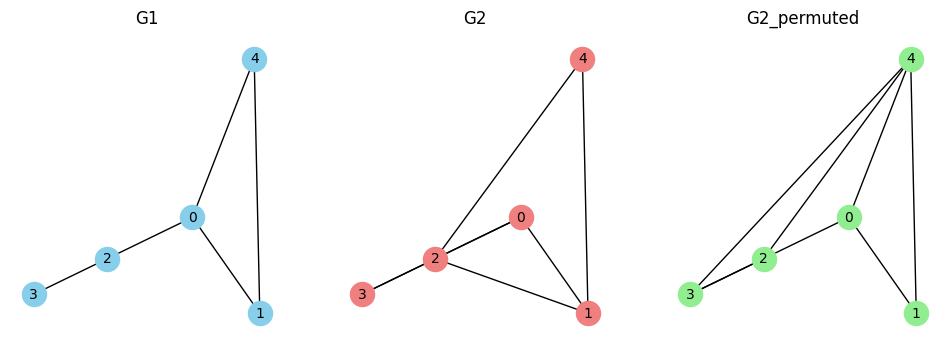

In [118]:
def permute_graph(G, alpha):
    num_vertices = len(G.nodes())
    num_fixed = int(alpha * num_vertices)
    permuted_vertices = list(range(num_fixed)) + random.sample(range(num_fixed, num_vertices), num_vertices - num_fixed)
    G_permuted = nx.relabel_nodes(G, {i: permuted_vertices[i] for i in range(num_vertices)})
    # print("G edges:", G.edges())
    # print("Permuted vertices:", permuted_vertices, "--->", [{i: permuted_vertices[i]} for i in range(n)])
    # print("G Permuted edges:", G_permuted.edges())
    # print("---------")
    return G_permuted

def calculate_edge_fractions(G1, G2_permuted):
    common_edges = len(set(G1.edges()).intersection(G2_permuted.edges()))
    unique_edges_G1 = len(set(G1.edges()) - set(G2_permuted.edges()))
    unique_edges_G2 = len(set(G2_permuted.edges()) - set(G1.edges()))
    no_edges = (len(G1) * (len(G1) - 1)) // 2 - len(G1.edges())

    pb00 = no_edges / ((len(G1) * (len(G1) - 1)) // 2)
    pb10 = unique_edges_G1 / ((len(G1) * (len(G1) - 1)) // 2)
    pb01 = unique_edges_G2 / ((len(G1) * (len(G1) - 1)) // 2)
    pb11 = common_edges / ((len(G1) * (len(G1) - 1)) // 2)

    return pb00, pb10, pb01, pb11

n = 5
p00 = 0.1
p10 = 0.2 
p01 = 0.3  
p11= 0.4

G1, G2 = create_correlated_er_graphs(n,p00,p10,p01,p11)
alpha = 0.3
G2_permuted = permute_graph(G2, alpha)


# Calculate edge fractions
pb00, pb10, pb01, pb11 = calculate_edge_fractions(G1, G2_permuted)
print("Fraction of pairs with no edges in both graphs (pb00):", pb00)
print("Fraction of pairs with edges in the first but not the second graph (pb10):", pb10)
print("Fraction of pairs with edges in the second but not the first graph (pb01):", pb01)
print("Fraction of pairs with edges in both graphs (pb11):", pb11)

visualize_graphs(G1, G2, G2_permuted)

In [120]:
#Setting up the parameters for the tries
tries = 10000
n = 5
p00 = 0.1
p01 = 0.2
p10 = 0.3
p11 = 0.4
alpha = 0.3

# Possibilities based on the p input and their frequencies:
possibilities = {
    (0,0): 0,
    (0,1): 0,
    (1,0): 0,
    (1,1): 0
}

# Running the tries
for i in range(0,tries):
    G1, G2 = create_correlated_er_graphs(n,p00,p10,p01,p11)
    G2_permuted = permute_graph(G2,alpha)
    pb00, pb10, pb01, pb11 = calculate_edge_fractions(G1, G2_permuted)

    all_vertex_pairs = [(u, v) for u in G1.nodes() for v in G1.nodes() if u < v]
    for e1 in G1.edges():
        if e1 in G2_permuted.edges():
            possibilities[(1,1)] += 1
        else:
            possibilities[(1,0)] += 1
    for e2 in G2_permuted.edges():
        # I do not check if e2 in G1 because I already did it in the previous check.
        if e2 not in G1.edges():
            possibilities[(0,1)] += 1
    for vertex_pair in all_vertex_pairs:
        if vertex_pair not in G1.edges() and vertex_pair not in G2_permuted.edges():
            possibilities[(0,0)] += 1

# Get all possible pairs of vertices that could form edges
all_vertex_pairs = [(u, v) for u in G1.nodes() for v in G1.nodes() if u < v]

sub = tries * len(all_vertex_pairs)
for k, v in possibilities.items():
    rel_freq = v/sub
    if k == (0,0):
        distance = p00 - rel_freq
    elif k == (0,1):
        distance = p01 - rel_freq
    elif k == (1,0):
        distance = p10 - rel_freq
    elif k == (1,1):
        distance = p11 - rel_freq
    print(k, v, rel_freq, distance)

(0, 0) 9583 0.09583 0.004170000000000007
(0, 1) 17611 0.17611 0.023890000000000022
(1, 0) 26391 0.26391 0.03609000000000001
(1, 1) 46415 0.46415 -0.06414999999999998
